In [3]:
%matplotlib inline
import torch
import cv2
from d2l import torch as d2l

In [4]:
img = cv2.imread(filename="images/dog_cat.png")
img.shape   # cv2读的顺序为：h w c

(285, 370, 3)

In [5]:
h, w = img.shape[:2]
h, w

(285, 370)

In [23]:

from myanchors import multibox_prior, show_bboxes
import matplotlib.pyplot as plt

# fig = plt.imshow(img[:, :, ::-1])     # 牛逼吧，最后一个维度是通道，逆一下 从BGR-->RGB
def display_anchors(fmap_w, fmap_h, s):
    """ 输入是特征图宽、高，尺寸列表 
        功能：给宽高为fmap_w、fmap_h的特征图的每个像素生成锚框并显示出来。即模仿特征图上生成的锚框映射到原图以检测不同大小的目标 """
    fmap = torch.zeros(size=(1, 10, fmap_h, fmap_w))
    anchors = multibox_prior(data=fmap, sizes=s, ratios=[1, 2, .5])
    bbox_scale = torch.tensor((w, h, w, h))
    show_bboxes(plt.imshow(img[:, :, ::-1]).axes, anchors[0] * bbox_scale)      # anchors的形状torch.Size([1, 527250, 4]), [0]为了降维

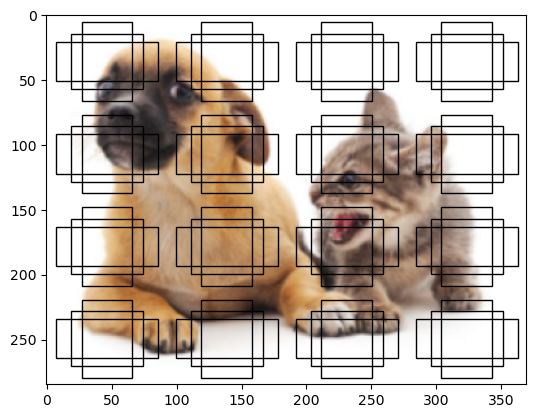

In [25]:
display_anchors(fmap_w=4, fmap_h=4, s=[.15])    # 锚框是在fmap_w、fmap_h的特征图的每个像素上生成的，而画在了img上而已

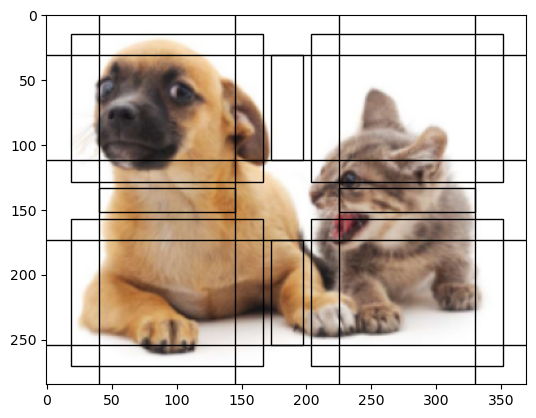

In [26]:
display_anchors(2, 2, [.4])     # 特征图减半，而size列表元素更大了，表示检测较中等物体

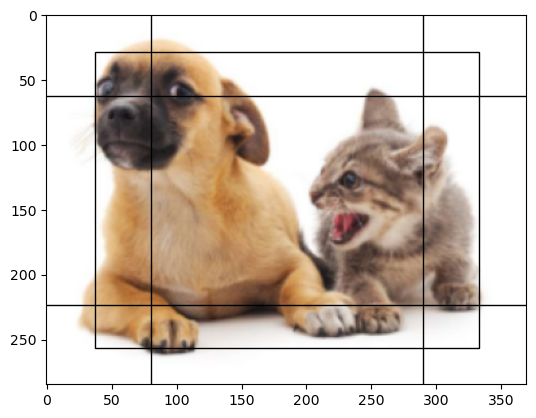

In [27]:
display_anchors(1, 1, [.8])     # 特征图再减半，而size列表元素更大了，表示检测较大物体